# Principal Component Analysis with Cancer Data

In [173]:
#Import all the necessary modules
%matplotlib inline
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [174]:
data = pd.read_csv(r'D:\D\AI\Great learning 2021\Unsupervised learning\Assignment\Cancer.csv')

In [175]:
data

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [176]:
df1 = data.copy()

In [177]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [178]:
df1.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [179]:
df1.shape

(699, 11)

In [180]:
df1.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [181]:
col_names = df1.columns

In [182]:
col_names

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [183]:
np.unique(df1["Bare Nuclei"])
# We could see "?" values in column, this should be removed from data set

array(['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', '?'],
      dtype=object)

In [184]:
df1["Bare Nuclei"].replace('?', "1", inplace = True) # replacing with mode

In [185]:
df1['Bare Nuclei'] = pd.to_numeric(df1['Bare Nuclei'])

In [186]:
np.unique(df1["Bare Nuclei"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [187]:
# Check for missing value in any other column
df1.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [188]:
df1.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [189]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [190]:
# Checking for duplicate columns
dups = df1.duplicated()
print(dups.sum())

9


In [191]:
df1.drop_duplicates(subset = None, keep="first", inplace = True)

In [192]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
ID                             690 non-null int64
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int64
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int64(11)
memory usage: 64.7 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [193]:
df2 = df1.copy()
df2 = df1.drop(["ID"], axis = 1)

In [194]:
# Check for correlation of variables
df2.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


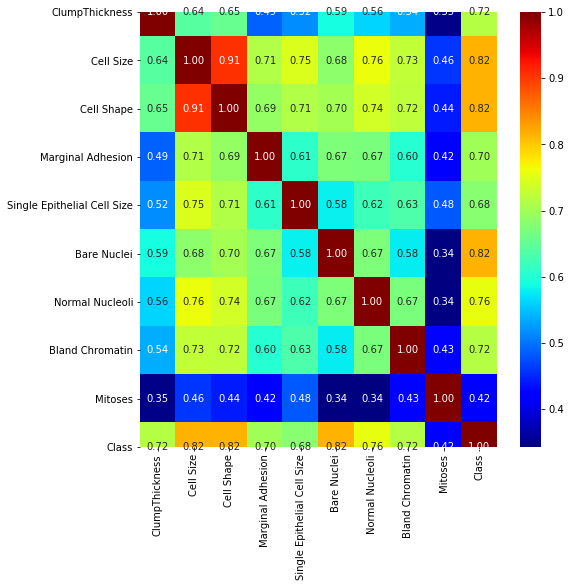

In [195]:
plt.figure(figsize=(8,8))
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, fmt='0.2f', annot_kws={'size':10}, cmap=plt.get_cmap("jet"))

In [196]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

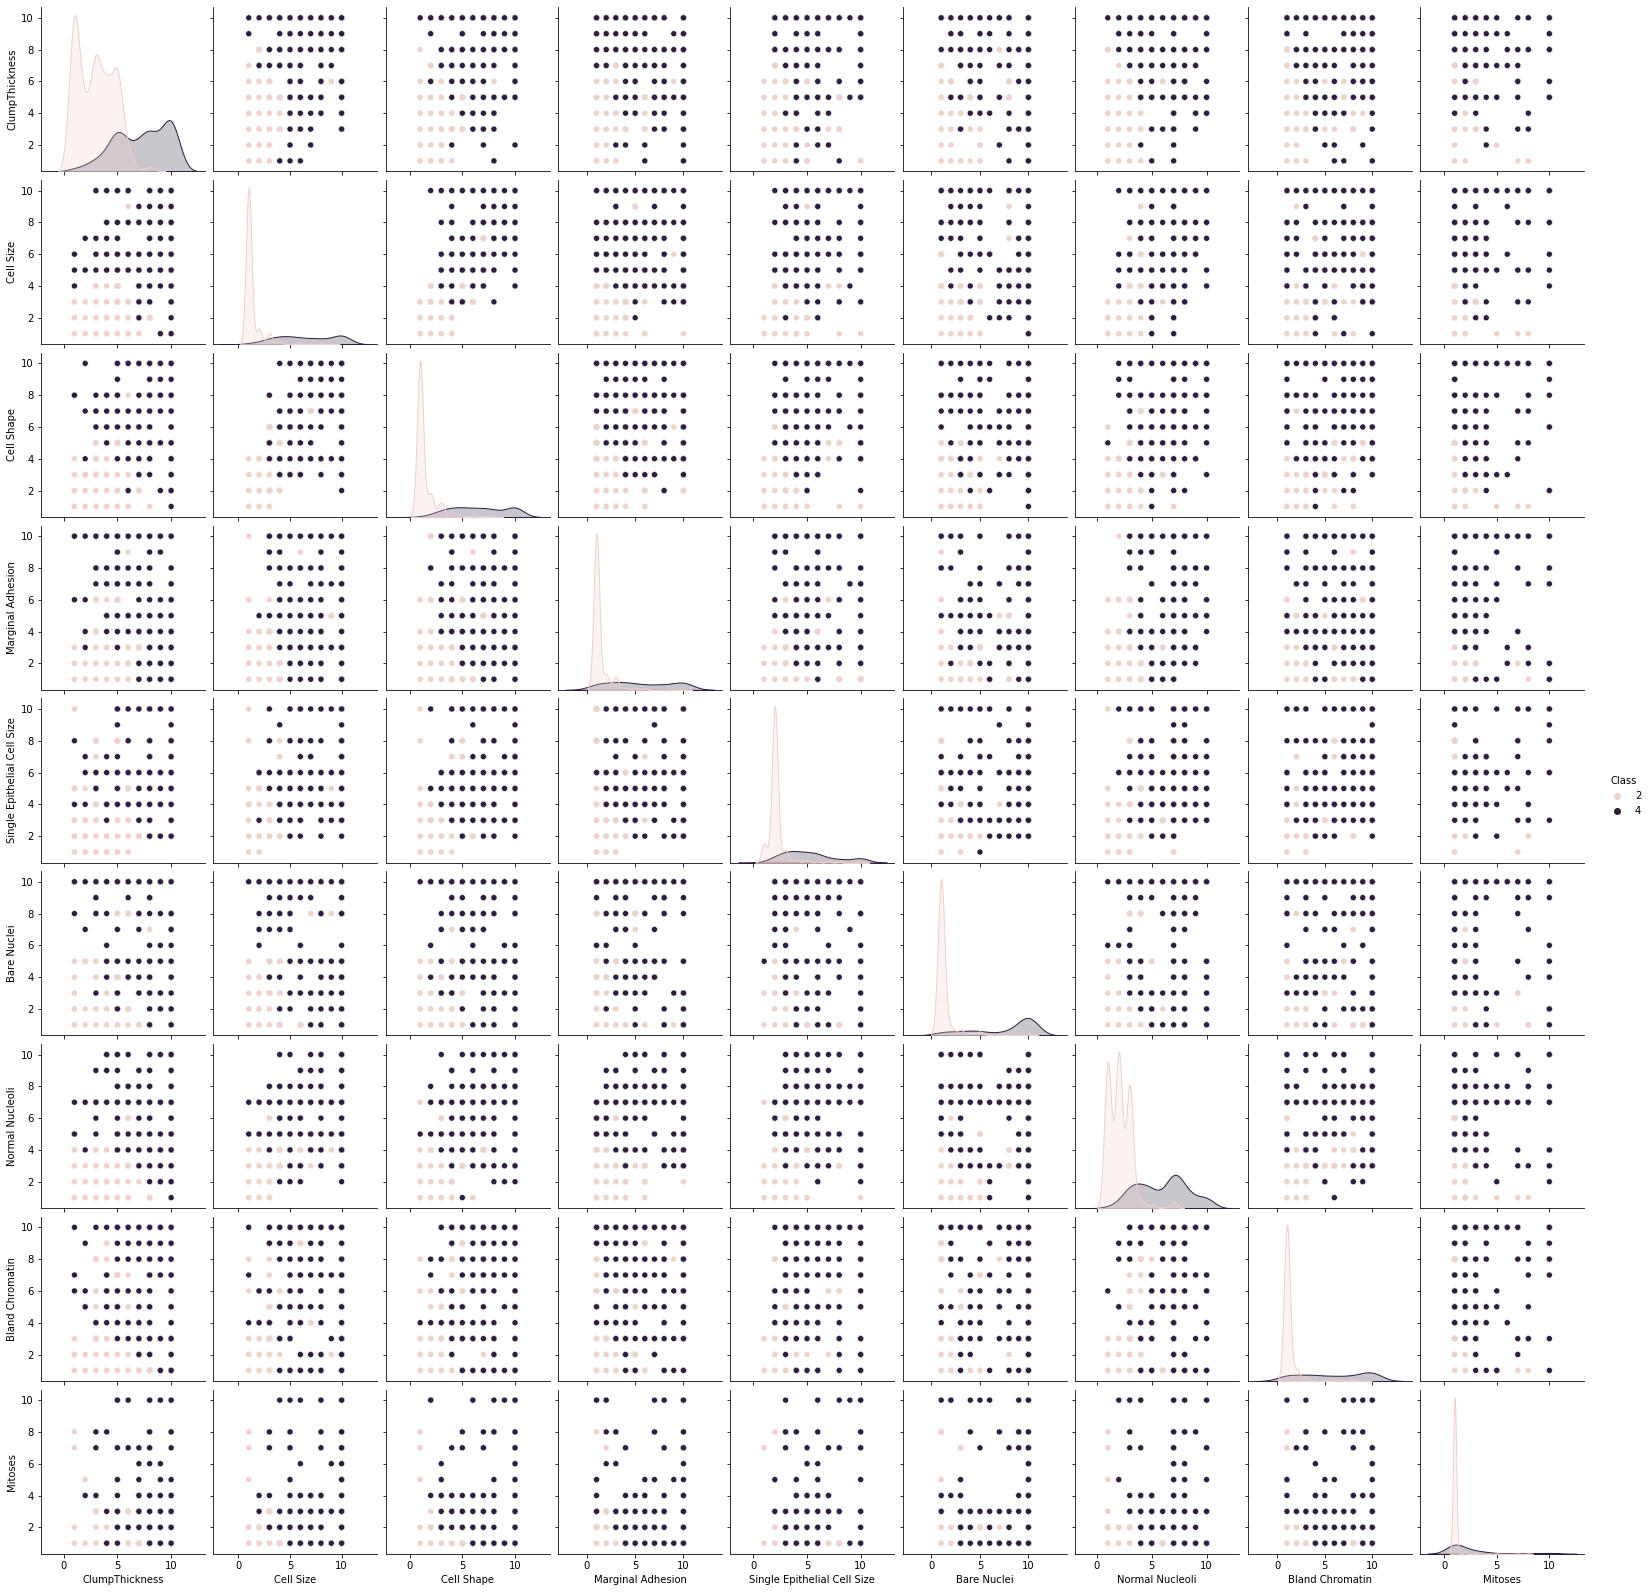

In [197]:
#Let us check the pair plot
sns.pairplot(df2, diag_kind="kde", hue = "Class")

# It is left skewed and bimodal(when hue is not used), have more than 5 natural clusters, correlation is not explained 
# well in pairplot. So used in correlation matrix

In [198]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

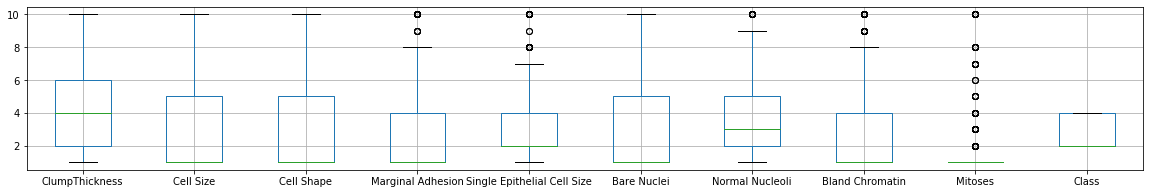

In [199]:
# We could see most of the outliers are now removed.

df2.boxplot(figsize= (20,3))

In [200]:
pd.crosstab(df2["Marginal Adhesion"], df2["Class"])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [201]:
df2["Marginal Adhesion"] = np.where(df2["Marginal Adhesion"] > 4, 4, df2["Marginal Adhesion"])
pd.crosstab(df2["Marginal Adhesion"], df2["Class"])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,15,161


In [202]:
print(pd.crosstab(df2["Single Epithelial Cell Size"], df2["Class"]))
df2["Single Epithelial Cell Size"] = np.where(df2["Single Epithelial Cell Size"] > 6, 6, df2["Single Epithelial Cell Size"])
pd.crosstab(df2["Single Epithelial Cell Size"], df2["Class"])

Class                          2   4
Single Epithelial Cell Size         
1                             44   1
2                            359  23
3                             29  42
4                              7  41
5                              5  34
6                              2  39
7                              3   9
8                              2  18
9                              0   2
10                             1  29


Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,8,97


In [203]:
print(pd.crosstab(df2["Normal Nucleoli"], df2["Class"]))
df2["Normal Nucleoli"] = np.where(df2["Normal Nucleoli"] > 7, 7, df2["Normal Nucleoli"])
pd.crosstab(df2["Normal Nucleoli"], df2["Class"])

Class              2   4
Normal Nucleoli         
1                149   2
2                158   7
3                125  35
4                  8  32
5                  4  30
6                  1   9
7                  7  64
8                  0  28
9                  0  11
10                 0  20


Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,123


In [204]:
print(pd.crosstab(df2["Bland Chromatin"], df2["Class"]))
df2["Bland Chromatin"] = np.where(df2["Bland Chromatin"] > 6, 6, df2["Bland Chromatin"])
pd.crosstab(df2["Bland Chromatin"], df2["Class"])

Class              2   4
Bland Chromatin         
1                396  40
2                 30   6
3                 12  30
4                  1  17
5                  2  17
6                  4  18
7                  2  14
8                  4  20
9                  1  15
10                 0  61


Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,11,128


In [205]:
print(pd.crosstab(df2["Mitoses"], df2["Class"]))
df2["Mitoses"] = np.where(df2["Mitoses"] > 3, 3, df2["Mitoses"])
pd.crosstab(df2["Mitoses"], df2["Class"])

Class      2    4
Mitoses          
1        439  132
2          8   27
3          2   30
4          0   12
5          1    5
6          0    3
7          1    8
8          1    7
10         0   14


Class,2,4
Mitoses,,
1,439,132
2,8,27
3,5,79


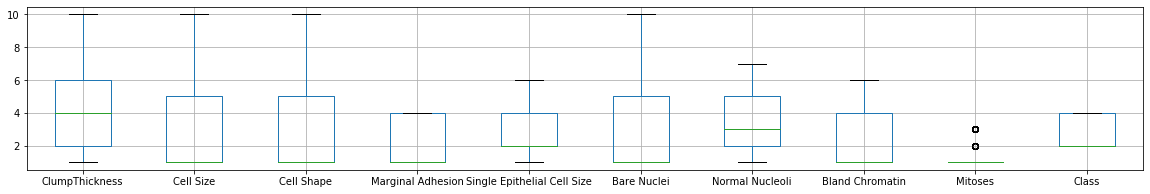

In [206]:
df2.boxplot(figsize= (20,3))

In [207]:
# standardizing columns

from scipy.stats import zscore

df_z = df2.drop(["Class"], axis = 1)
df_z = df_z.apply(zscore)
df_z.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.202823,-0.701698,-0.745040,-0.781803,-0.606754,-0.686858,-0.131401,-0.673794,-0.438024
1,0.202823,0.285065,0.268920,1.530101,1.934431,1.803153,-0.131401,-0.181817,-0.438024
2,-0.507572,-0.701698,-0.745040,-0.781803,-0.606754,-0.410190,-0.131401,-0.673794,-0.438024
3,0.558020,1.600748,1.620866,-0.781803,0.028542,0.143146,-0.131401,1.786088,-0.438024
4,-0.152375,-0.701698,-0.745040,0.759466,-0.606754,-0.686858,-0.131401,-0.673794,-0.438024


# Q6 Create a covariance matrix for identifying Principal components

In [208]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(df_z.T) # np.cov(scaled training data)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.55329897 0.56014292 0.59150555
  0.57632311 0.5573719  0.42745595]
 [0.64410677 1.00145138 0.9066632  0.72204998 0.78736392 0.68556472
  0.74749076 0.73254055 0.51098944]
 [0.65453792 0.9066632  1.00145138 0.7042574  0.75864187 0.70518656
  0.73047144 0.72736411 0.48167882]
 [0.55329897 0.72204998 0.7042574  1.00145138 0.6675427  0.69693138
  0.68237584 0.64893231 0.42473633]
 [0.56014292 0.78736392 0.75864187 0.6675427  1.00145138 0.64591131
  0.67167598 0.70333283 0.49711992]
 [0.59150555 0.68556472 0.70518656 0.69693138 0.64591131 1.00145138
  0.69379705 0.62721796 0.45258904]
 [0.57632311 0.74749076 0.73047144 0.68237584 0.67167598 0.69379705
  1.00145138 0.68956763 0.41318259]
 [0.5573719  0.73254055 0.72736411 0.64893231 0.70333283 0.62721796
  0.68956763 1.00145138 0.4868789 ]
 [0.42745595 0.51098944 0.48167882 0.42473633 0.49711992 0.45258904
  0.41318259 0.4868789  1.00145138]]


In [209]:
cov_matrix.shape

(9, 9)

# Q7 Identify eigen values and eigen vector

In [210]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-3.02199806e-01 -1.79774768e-02  1.42451851e-02 -9.05446323e-01
   1.54182868e-01 -1.63546675e-01  6.53296095e-02  1.82879526e-01
  -9.13056785e-03]
 [-3.71169888e-01  6.48557497e-02  7.34223035e-01  7.40113350e-02
   2.98046020e-01  2.92846392e-01 -2.63092715e-01 -1.83665096e-01
   1.89537382e-01]
 [-3.67686019e-01  1.03227623e-01 -6.64295797e-01  1.04670334e-02
   2.80818693e-01  4.61194962e-01 -2.45453832e-01 -2.25481130e-01
   1.00515323e-01]
 [-3.34994926e-01  1.85863277e-01 -4.53107272e-02  1.39057987e-01
  -4.51982267e-01 -3.64109518e-02 -3.27294566e-01  6.38775792e-01
   3.33276286e-01]
 [-3.45695688e-01 -4.10338556e-03 -7.48887448e-02  2.62761983e-01
   3.02799368e-01 -6.68372741e-01 -3.23781727e-01 -2.23058080e-02
  -4.02596244e-01]
 [-3.34016499e-01  1.16311748e-01  8.24345421e-02 -8.95963505e-02
  -6.34142777e-01  1.86518381e-01  1.06992552e-02 -3.21154082e-01
  -5.65597922e-01]
 [-3.41425659e-01  2.25177171e-01 -5.60326611e-02  9.75108546e-02
  -1.45671

# Q8 Find variance and cumulative variance by each eigen vector

In [211]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Variance Explained", var_exp, "\n")
print("Cumulative Variance Explained", cum_var_exp)

# Usually people try to gain more than 90% information. So taking 7 variables will do. It depends on the people.

Variance Explained [67.92796889005969, 7.605642615624368, 5.594186171371515, 4.767703563180119, 3.722438717040597, 3.4004193555222795, 3.161827063875606, 2.820129430092823, 0.9996841932330012] 

Cumulative Variance Explained [ 67.92796889  75.53361151  81.12779768  85.89550124  89.61793996
  93.01835931  96.18018638  99.00031581 100.        ]


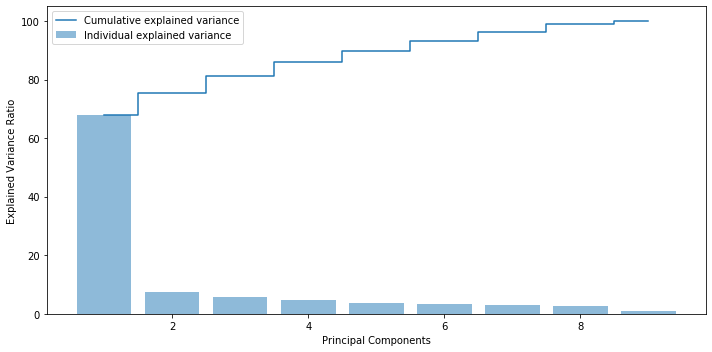

In [212]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [213]:
from sklearn.decomposition import PCA

In [214]:
pca = PCA(n_components = 7)
# Because the information gained becomes less after 7th component and information in 7th component is greater than 95%.
data_trans = pca.fit_transform(df_z)

In [215]:
data_trans

array([[-1.55553863e+00, -3.44474009e-02,  6.61474828e-01, ...,
         3.22002337e-01,  1.53595519e-01, -2.25983709e-01],
       [ 1.83475531e+00, -9.11634582e-01, -3.13555789e-01, ...,
        -1.41995365e+00, -2.75803547e-01,  1.28703958e+00],
       [-1.67780816e+00, -7.93982323e-02,  4.30389008e-02, ...,
         2.78552663e-01,  3.72365204e-01, -7.59872363e-02],
       ...,
       [ 4.09081102e+00,  9.48656375e-02, -1.32558668e+00, ...,
        -1.89294821e-03,  4.00120402e-01, -7.43501849e-01],
       [ 2.56550830e+00, -1.31396393e+00, -1.07376951e+00, ...,
         8.37640278e-01, -4.85724906e-01, -1.13992813e+00],
       [ 2.79296309e+00, -1.41404950e+00, -9.72456061e-01, ...,
        -1.69729279e-01,  2.07385298e-01, -1.07773547e+00]])

In [216]:
data_trans.shape

(690, 7)

# Q10 Find correlation between components and features

In [217]:
pca.components_.shape

(7, 9)

In [218]:
df_comp = pd.DataFrame(pca.components_, columns=list(df_z))
df_comp

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.302200,0.371170,0.367686,0.334995,0.345696,0.334016,0.341426,0.338555,0.247447
1,0.017977,-0.064856,-0.103228,-0.185863,0.004103,-0.116312,-0.225177,0.000746,0.941286
2,0.905446,-0.074011,-0.010467,-0.139058,-0.262762,0.089596,-0.097511,-0.254618,-0.061907
3,0.154183,0.298046,0.280819,-0.451982,0.302799,-0.634143,-0.145672,0.254944,-0.155589
4,0.065330,-0.263093,-0.245454,-0.327295,-0.323782,0.010699,0.482475,0.649129,0.006719
5,-0.182880,0.183665,0.225481,-0.638776,0.022306,0.321154,0.411856,-0.444805,0.053209
6,0.009131,-0.189537,-0.100515,-0.333276,0.402596,0.565598,-0.507924,0.286713,-0.143665


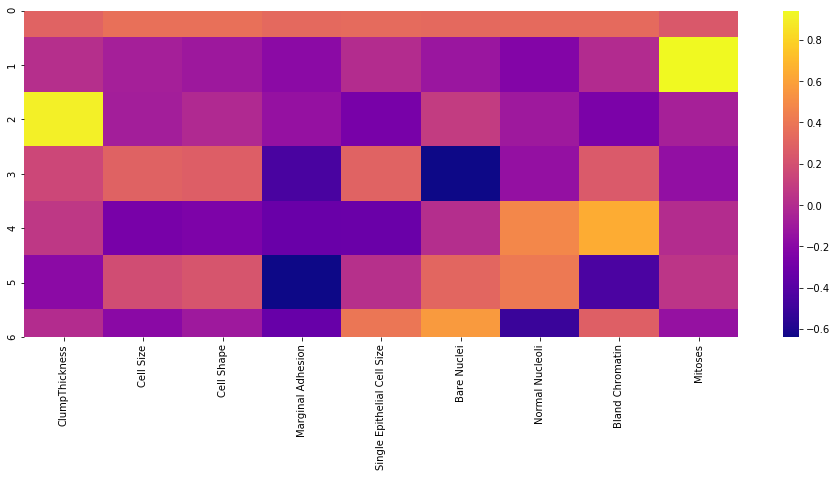

In [219]:
plt.figure(figsize=(16,6))
sns.heatmap(df_comp, cmap = "plasma")

In [220]:
df_temp = pd.DataFrame(data_trans)
df_temp.head()

,0,1,2,3,4,5,6
0,-1.555539,-0.034447,0.661475,0.133628,0.322002,0.153596,-0.225984
1,1.834755,-0.911635,-0.313556,-1.016599,-1.419954,-0.275804,1.287040
2,-1.677808,-0.079398,0.043039,-0.151350,0.278553,0.372365,-0.075987
3,1.605970,-0.513714,0.069019,1.832178,0.558693,0.231545,0.533547
4,-1.146562,-0.327298,0.125537,-0.617764,-0.205652,-0.765972,-0.742895


In [221]:
df_temp.corr()

,0,1,2,3,4,5,6
0,1.000000e+00,1.538492e-16,-8.217389e-17,2.324639e-17,1.321047e-17,-4.599439e-17,-8.832097e-17
1,1.538492e-16,1.000000e+00,-2.850464e-16,-1.422847e-16,-1.464952e-16,-6.749719e-17,-7.291412e-17
2,-8.217389e-17,-2.850464e-16,1.000000e+00,2.883637e-16,6.229218e-17,-6.456014e-18,-1.020217e-17
3,2.324639e-17,-1.422847e-16,2.883637e-16,1.000000e+00,-1.007494e-16,6.643576e-17,-5.065095e-17
4,1.321047e-17,-1.464952e-16,6.229218e-17,-1.007494e-16,1.000000e+00,-2.007813e-16,1.000546e-16
5,-4.599439e-17,-6.749719e-17,-6.456014e-18,6.643576e-17,-2.007813e-16,1.000000e+00,2.640298e-16
6,-8.832097e-17,-7.291412e-17,-1.020217e-17,-5.065095e-17,1.000546e-16,2.640298e-16,1.000000e+00
